In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def load_file(data_file,separator=None):
    '''
    A function to load data files into a pandas DataFrame object.
    Inputs:
    1. data_file (required): the path for a data file ending in 'xls', 'xslx', 'cxv' or 'txt'
    2. separator (optional): the character(s) used to separator data in each row of the dataset
    
    Outputs:
    1. A DataFrame object with the data in data_file.
    '''
    
    # if data_file is an excel file, use the read_excel function
    if data_file.endswith('.xls') or data_file.endswith('.xlsx'):
        return pd.read_excel(data_file)
    
    # if the data_file is a .csv or .txt file, check if a separator was specified and load
    elif data_file.endswith('.csv') or data_file.endswith('.txt'):
        if separator:
            return pd.read_csv(data_file,separator=separator)
        else:
            return pd.read_csv(data_file)
        
    # otherwise raise an exception stating that the filetype was unknown
    else:
        print("Unknown file type!")
        raise

def find_duplicates_based_on_column(df,column):
    '''
    A function to determine which rows have duplicated data in the specified column.
    
    Inputs:
    1. df (required): a DataFrame object
    2. column (required): the name of the column that we're looking for duplicated in
    
    Outputs:
    1. A numpy array that contains the unique duplicated values in the specified column
    2. A boolean mask (numpy array) that has # of elements = # of rows in 
    the table where an element is True is the data in the specified column is dupicated,
    and False if it's not
    
    '''
    # determine how many times each ID in id_column appears
    counts = df[column].value_counts()
    
    # create a boolean mask that is True when that id appears more than once
    is_duplicate = counts > 1
    
    # get the actual index (the left side) for the places where id_is_duplicate is True
    duplicates = counts.index[is_duplicate]
    
    # convert that to a numpy array
    duplicates = np.array(duplicates)
    
    # also return an array that has # of elements = # of rows in the table
    # where an element is True is the ID for that row is in the list
    # of duplicate IDs, and False if it's not
    duplicate_mask = np.array(df[column].isin(duplicates))
    
    return duplicates, duplicate_mask

def remove_rows(df,boolean_mask):
    '''
    A function to remove rows.
    
    Inputs:
    1. df (required): a DataFrame object
    2. boolean_mask: a boolean mask that is True for rows that 
    should be deleted from the DataFrame and False for rows that
    should remain
    
    Outputs:
    1. A new DataFrame object w/ the specified rows removed.
    '''

    new_df = df.loc[boolean_mask,:].copy()
    return new_df


In [43]:
df = load_file('credit_card_data.xls')
duplicate_ids, duplicate_mask = find_duplicates_based_on_column(df,'ID')
no_duplicate_df = remove_rows(df,~duplicate_mask)

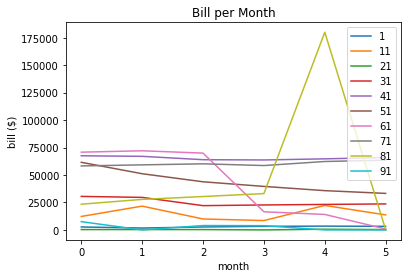

In [56]:
def create_line_plot(df,column_list,row_list,title=None,xlabel=None,ylabel=None):
    for row in row_list:
        arr = df[column_list].iloc[row].tolist()
        plt.plot(arr)
    plt.legend(row_list,loc='upper right')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
column_list = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
row_list = range(1,100,10)
create_line_plot(no_duplicate_df,column_list,row_list,'Bill per Month','month','bill ($)')

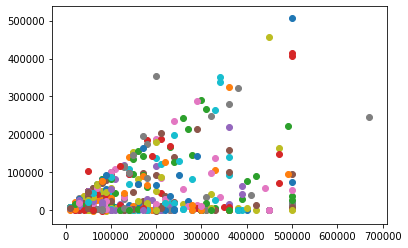

In [62]:
def create_scatter_plot(df,x_data_column,y_data_column,row_list,title=None,xlabel=None,ylabel=None):
    for row in row_list:
        plt.scatter(df[column1].iloc[row],df[column2].iloc[row])

create_scatter_plot(no_duplicate_df,'LIMIT_BAL','BILL_AMT1',range(0,5000,10))

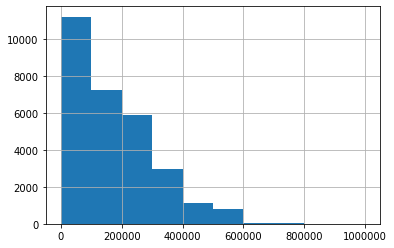

In [9]:
def create_histogram(df, column_name, bins=None,title=None,xlabel=None,ylabel=None):
    no_duplicate_df[column_name].hist(bins=bins)

create_histogram(no_duplicate_df)

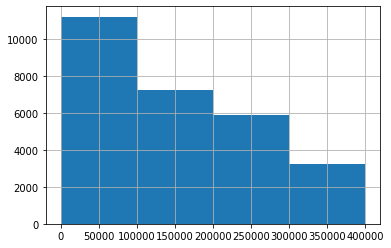

In [11]:
create_histogram(no_duplicate_df,range(0,500000,100000))

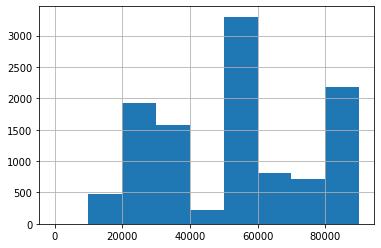

In [15]:
create_histogram(no_duplicate_df,range(0,100000,10000))

In [79]:
.index.tolist()

[2, 1, 3, 5, 4, 6, 0]

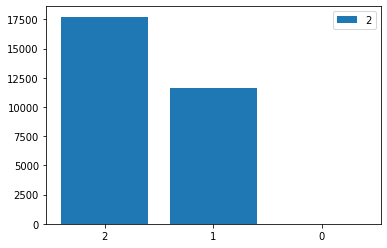

In [87]:
def create_bar_chart(values,labels,title=None,xlabel=None,ylabel=None):
    plt.bar(np.arange(len(labels)),values)
    plt.xticks(np.arange(len(labels)),labels)
    plt.legend(labels)

def get_counts_per_column(df,column):
    value_counts = no_duplicate_df[column].value_counts()
    indices = value_counts.index.tolist()
    counts = value_counts.tolist()
    return indices, counts
    
inds, counts = get_counts_per_column(no_duplicate_df,'SEX')
create_bar_chart(counts,inds)

# Activities

1. Make a line plot of payment amounts ('PAY_AMT*') per month for 10 individuals. You can pick any ten individuals. Make sure your plot has useful figure and axis titles.

In [ ]:
# PUT YOUR CODE HERE

2. Create a scatter plot that compares BILL_AMT1 and PAY_AMT1 for 500 individuals. You can pick any 500 individuals. Make sure your plot has useful figure and axis titles.

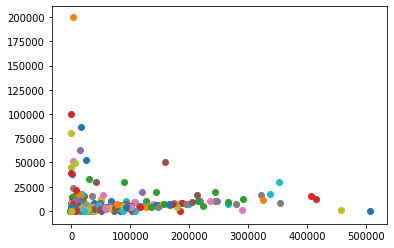

In [65]:
# PUT YOUR CODE HERE

3. Make a histogram for PAY_AMT4. Experiment with different bin sizes and pick the one that you think best communicates the distribution of the data.

In [ ]:
# PUT YOUR CODE HERE

4. Create a bar chart that plots the number of individuals in each educational group.

In [ ]:
# PUT YOUR CODE HERE

CHALLENGE! Create a bar chart that plots the average limit balance per educational group. (If you get this without my input, I'll give you 3 bonus points on assignment 2.)

In [ ]:
# PUT YOUR CODE HERE